In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
houses_train = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/train.csv')
houses_test = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/test.csv')

In [3]:
print(f"Houses train: {houses_train.shape}")
print(f"Houses test: {houses_test.shape}")

Houses train: (1460, 81)
Houses test: (1459, 80)


In [4]:
houses_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

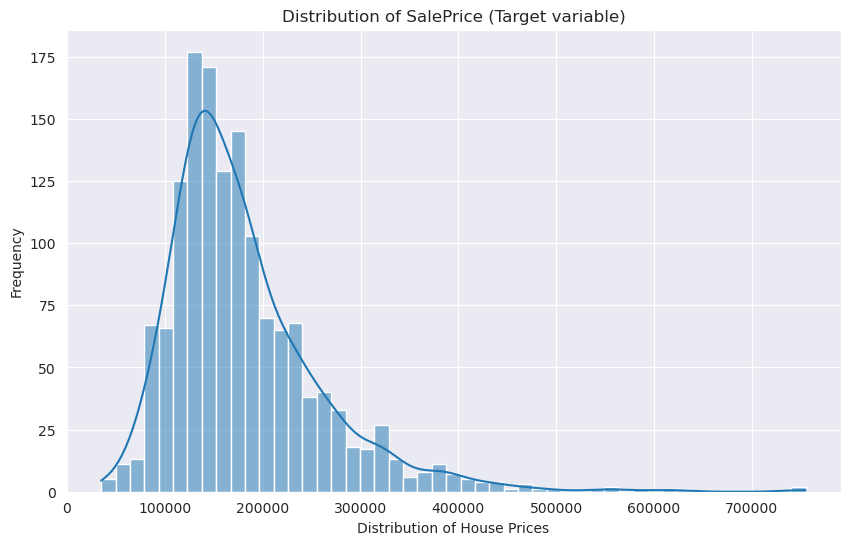

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=houses_train, x="SalePrice",  kde=True)
plt.title('Distribution of SalePrice (Target variable)')
plt.xlabel('Distribution of House Prices')
plt.ylabel('Frequency')
plt.show()

In [6]:
print("Skewness: %f" % houses_train['SalePrice'].skew())
print("Kurtosis: %f" % houses_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
def cleaning_data(data, threshold=0.70):
    df = data.copy()

    if 'Id' in df.columns:
        df = df.drop(columns=['Id'], axis=1)

    total_null = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum() / len(df)).sort_values(ascending=False)

    missing_values = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percent'])
    print("Missing Values Summary:")
    print(missing_values.head(20))

    missing_features = percentage[percentage > threshold].index.tolist()
    df = df.drop(missing_features, axis=1)
    print(f"\nFeatures dropped: {missing_features}")
    print(f"Remaining missing values:\n{df.isnull().sum()}")

    return df

In [8]:
houses_train = cleaning_data(houses_train)
houses_test = cleaning_data(houses_test)

Missing Values Summary:
              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
MSSubClass        0  0.000000

Features dropped: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
Remaining missing values:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64
M

In [9]:
def separate_variables(data):
    cat_cols = list(data.select_dtypes(include=['object']).columns)
    num_cols = list(data.select_dtypes(include=np.number).columns)

    print("Categorical Variables:")
    print(cat_cols)
    print("\nNumerical Variables:")
    print(num_cols)

    return cat_cols, num_cols

In [10]:
cat_train, num_train = separate_variables(houses_train)
cat_test, num_test = separate_variables(houses_test)

Categorical Variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical Variables:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Encl